**Milestone 1: EDA, Feature Engineering, and Visualisation**

In [2]:
#IMPORTNG THE LIBARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Exploratory Data Analysis** (understanding, cleaning and visualising the dataset)

In [3]:
df = pd.read_csv('/content/oil.csv')

In [4]:
df.head(5)

,percentage yield,gravity,vapour pressure,ten percent distillation point,fraction end point
0,6.9,38.4,6.1,220,235
1,14.4,40.3,4.8,231,307
2,7.4,40.0,6.1,217,212
3,8.5,31.8,0.2,316,365
4,8.0,40.8,3.5,210,218


In [5]:
df.shape

(32, 5)

In [13]:
df.columns = df.columns.str.strip()

# Check for and clean any white spaces in cell values
for column in df.columns:
    if df[column].dtype == "object":  # Only clean string values
        df[column] = df[column].str.strip()


In [14]:
print("Duplicate Rows:", df.duplicated().sum())
print("Missing Values:\n", df.isnull().sum())
print("Descriptive Statistics:\n", df.describe())

Duplicate Rows: 0
Missing Values:
 percentage yield                  0
gravity                           0
vapour pressure                   0
ten percent distillation point    0
fraction end point                0
dtype: int64
Descriptive Statistics:
        percentage yield    gravity  vapour pressure  \
count         32.000000  32.000000         32.00000   
mean          19.659375  39.250000          4.18125   
std           10.722417   5.635429          2.61983   
min            2.800000  31.800000          0.20000   
25%           11.650000  36.625000          1.80000   
50%           17.800000  40.000000          4.80000   
75%           27.050000  40.925000          6.10000   
max           45.700000  50.800000          8.60000   

       ten percent distillation point  fraction end point  
count                       32.000000           32.000000  
mean                       241.500000          332.093750  
std                         37.541375           69.755961  
min        

**Data Come cleaned**

In [15]:
df["boiling_range"] = df["fraction end point"] - df["ten percent distillation point"]  # Boiling range
df["yield_to_gravity"] = df["percentage yield"] / df["gravity"]  # Efficiency ratio
df["pressure_to_gravity"] = df["vapour pressure"] / df["gravity"]  # Volatility index


**Data Visualisation**

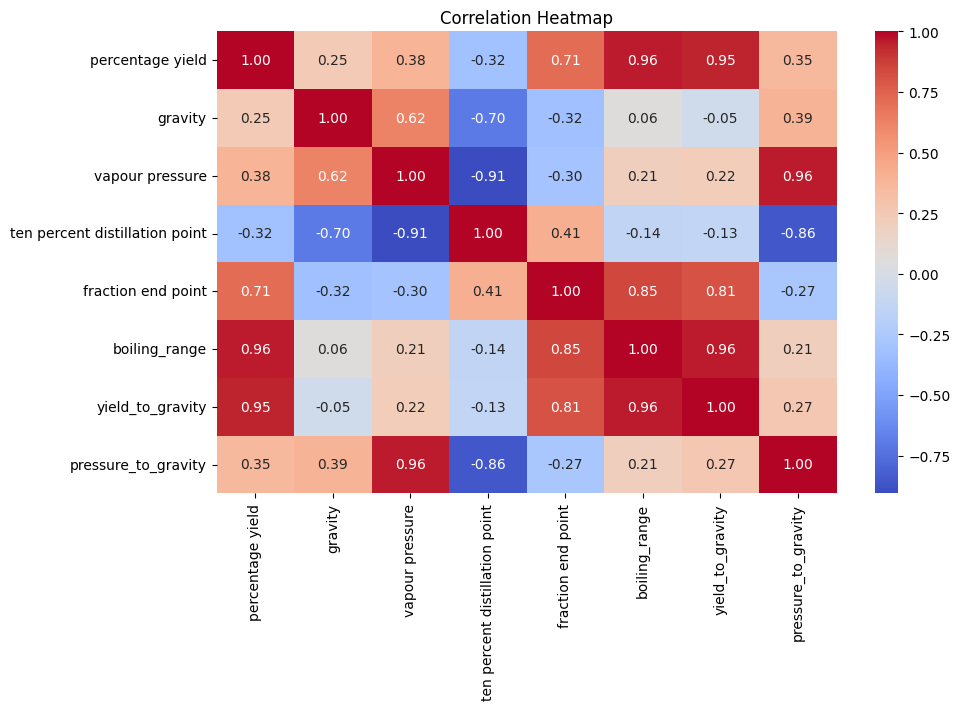

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

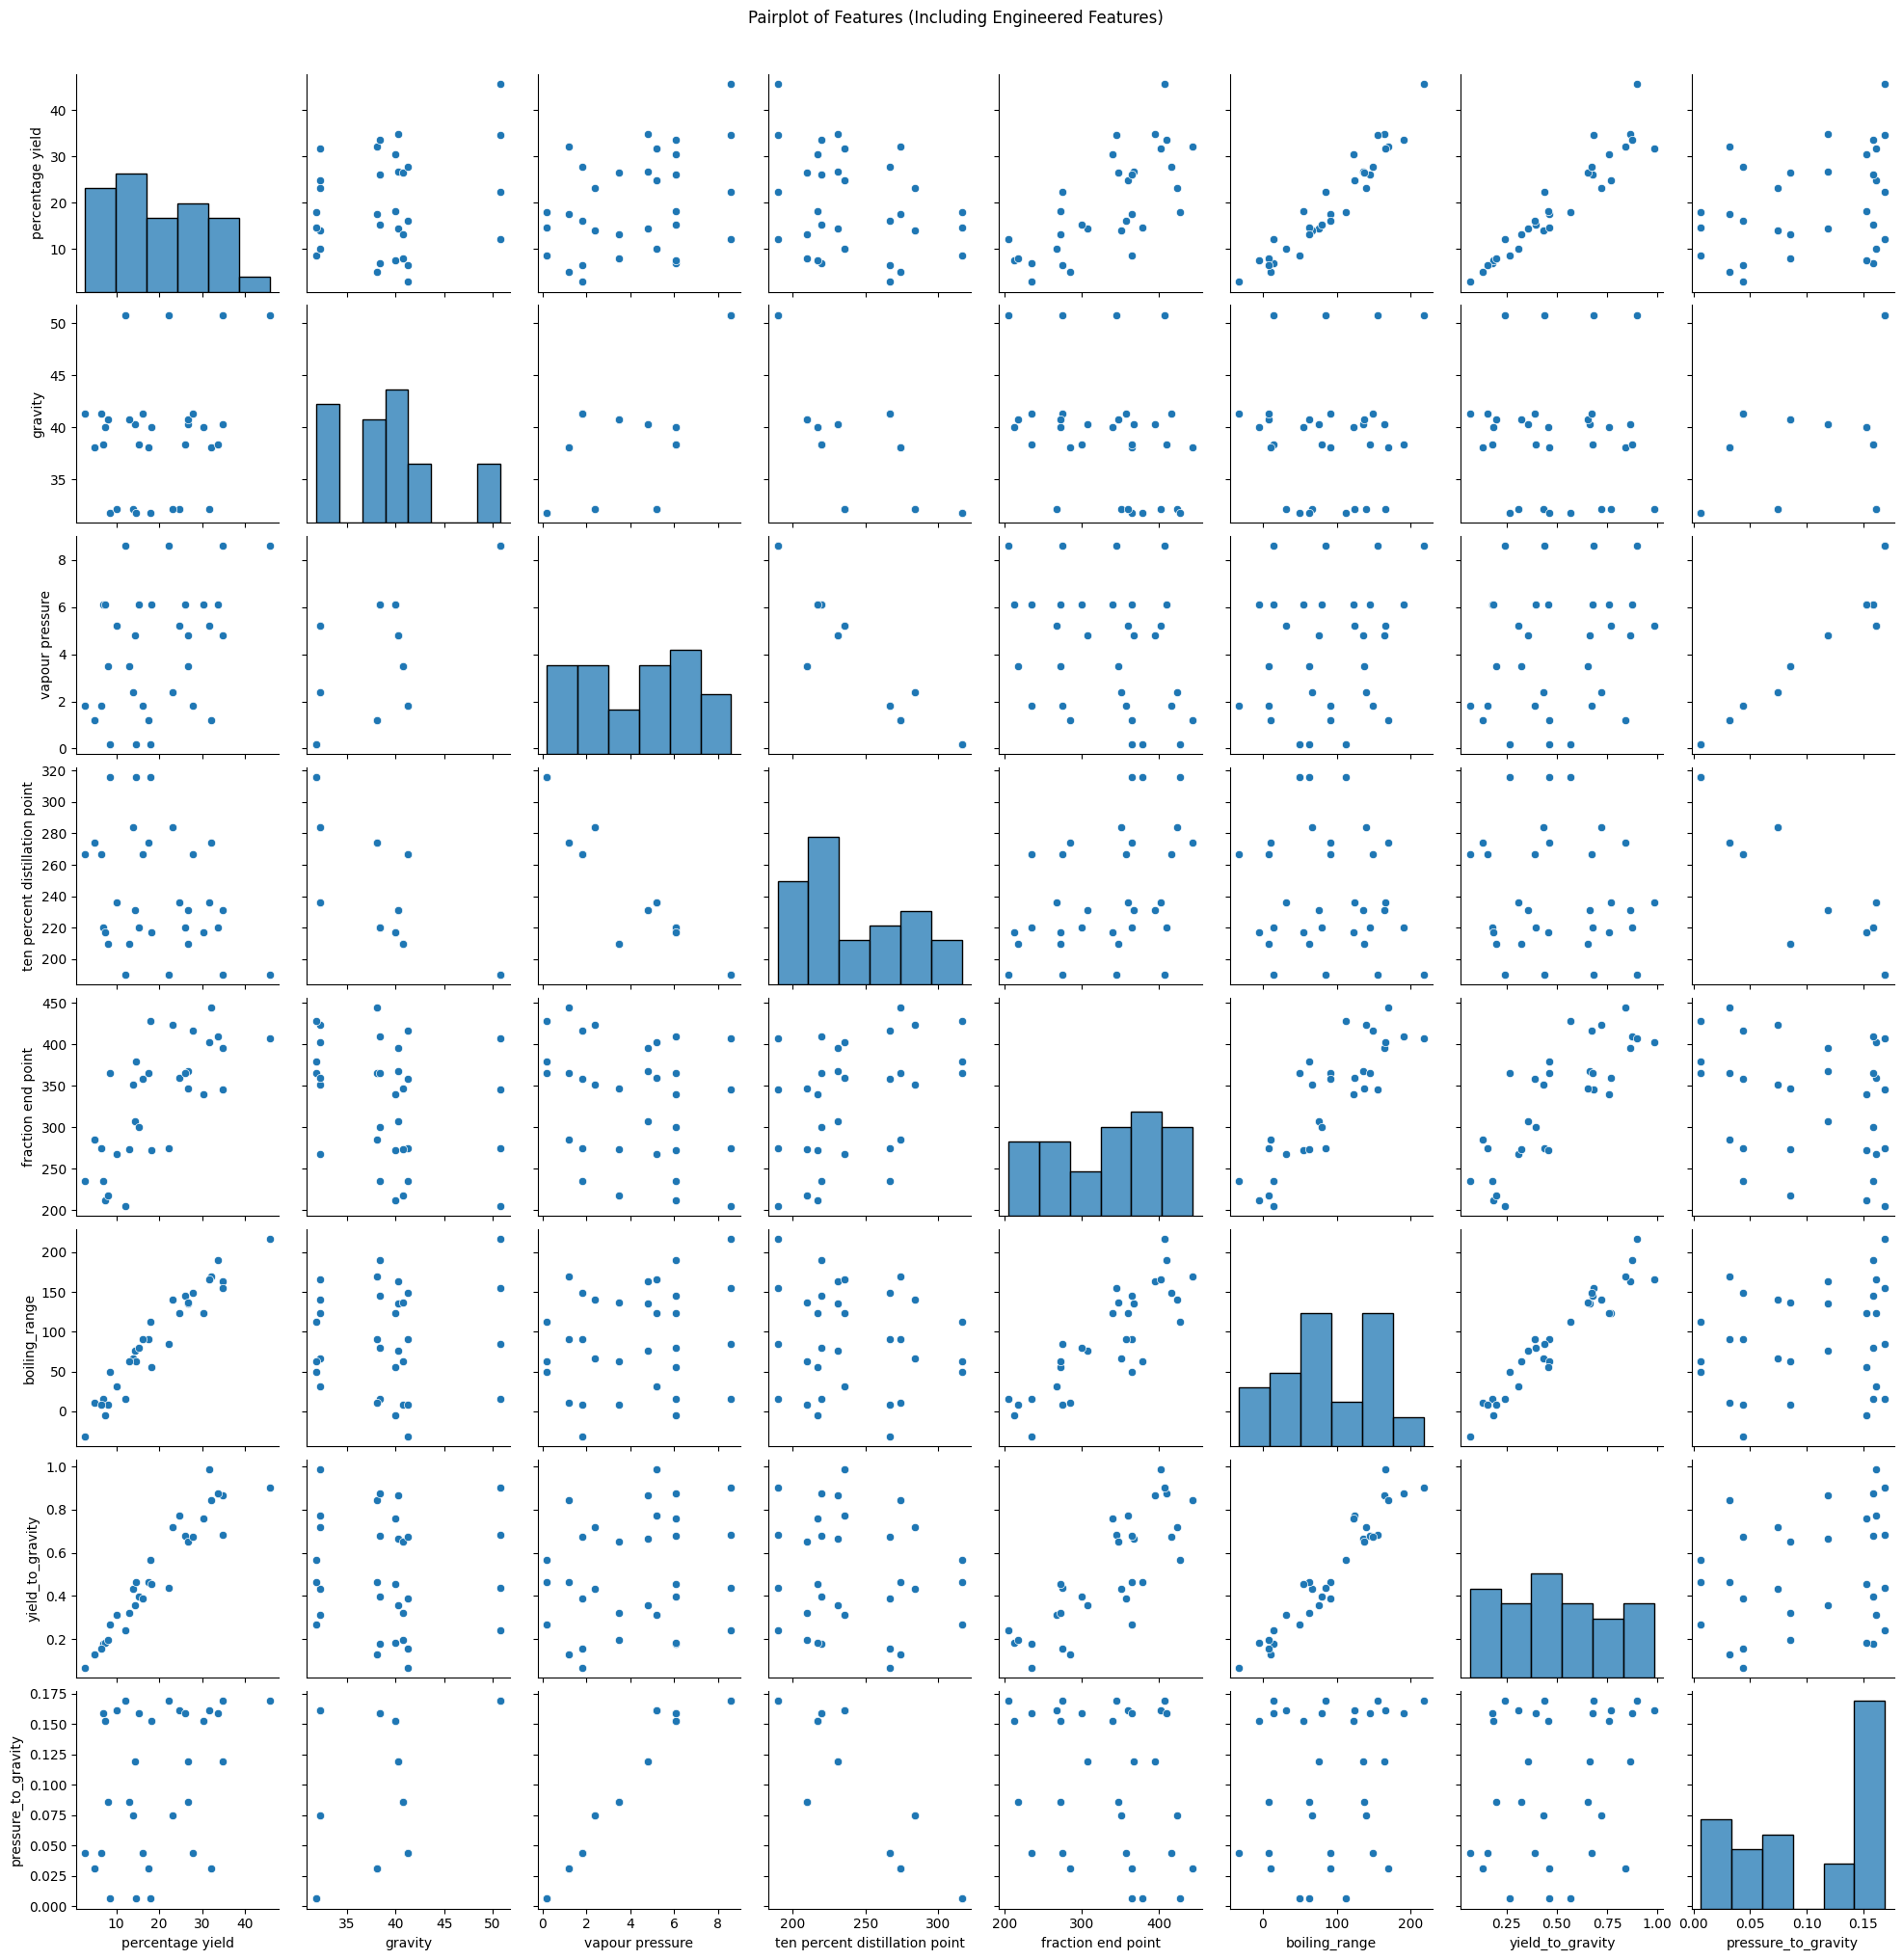

In [17]:
sns.pairplot(df)
plt.suptitle("Pairplot of Features (Including Engineered Features)", y=1.02)
plt.show()

In [18]:
print("Skewness:\n", df.skew())

Skewness:
 percentage yield                  0.406020
gravity                           0.617930
vapour pressure                   0.121276
ten percent distillation point    0.543255
fraction end point               -0.292643
boiling_range                    -0.032523
yield_to_gravity                  0.122549
pressure_to_gravity              -0.328043
dtype: float64


**Saving the Refined Dataset**

In [19]:
# Save the refined dataset
df.to_csv("refined_data_with_features.csv", index=False)
print("Refined dataset saved as 'refined_data_with_features.csv'")

Refined dataset saved as 'refined_data_with_features.csv'
